## Final Project Submission

Please fill out:
* Student name: Lucy Hayes
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Brandon Lewis
* Blog post URL:


# Importing Data and Getting a Quick Glance

In [1]:
# Import Pandas and read in csv
import pandas as pd
df = pd.read_csv("kc_house_data.csv")
print(len(df))
df.head()


21597


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
## Let's look at the distribution of the data 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Removing/Replacing NA's 

In [3]:
# Glance at NAs
nas = df.isna()
nas.sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
## NA Results
## yr_renovated: 2842, 13% - REPLACE W MEDIAN since it is a year and not categoriacl
## view: 63 - so few and insignificant - let's remove them
## waterfront: 2376
## Let's check that this is categorical:
df.waterfront.value_counts()
# Great, since there is a large discrepenancy, let's replace the NA's with 0's

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [5]:
# INITIAL CLEAN
# Replace yr_renovated with median
df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_renovated'].median())
# Replace Waterfront NA's with 0's
df['waterfront'] = df['waterfront'].fillna(0)
#drop remaining views nas
df = df.dropna()

#check that all na's are gone
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Check for Placeholder or Extreme Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [7]:
##sqft_basement is listed as an object. Let's look at the values...
df.sqft_basement.value_counts().head()
#0's are implying no basement

0.0      12798
?          452
600.0      216
500.0      209
700.0      207
Name: sqft_basement, dtype: int64

In [8]:
# 12798 0's -- implying no basement?
# 452 ?'s  Let's remove these and convert to a float:

df = df[df.sqft_basement != '?']
df["sqft_basement"] = pd.to_numeric(df.sqft_basement)
df.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 21 columns):
id               21082 non-null int64
date             21082 non-null object
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
waterfront       21082 non-null float64
view             21082 non-null float64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null float64
yr_built         21082 non-null int64
yr_renovated     21082 non-null float64
zipcode          21082 non-null int64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [9]:
# add a column for T/F has basement or not
has_basement = []
for basement in df["sqft_basement"]:
    if basement == 0:
        has_basement.append(0)
    else:
        has_basement.append(1)
df['has_basement'] = has_basement

In [10]:
# Let's look at the distribution of the dataframe again and see if there are any values that seem out of the ordinary
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
count,2.108200e+04,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,...,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,4.582793e+09,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,0.006688,0.233327,3.409828,...,1789.000000,291.359975,1971.023337,68.359359,98077.858837,47.560371,-122.213843,1986.917418,12732.514135,0.392942
std,2.876423e+09,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.081509,0.765066,0.650597,...,828.369355,442.007858,29.323120,363.029573,53.528769,0.138568,0.140607,685.544250,27148.781580,0.488416
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123700e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,...,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904970e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000,0.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000,1.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


<b>There are a few things that seem out of the ordinary:</b>
<br/>
    33 Bedrooms seems unfathomable
<br/>
    Yr_Renovated has many 0's - probably standing for a house that was not renovated 
<br/>
    We should also check the categories of the following: view, condition, grade, and zipcode


In [11]:
## 33 bedrooms seems unfathomable -- let's look at value counts
df.bedrooms.value_counts()
# 1 value for 33 bedrooms
df.loc[df["bedrooms"] >30]
#clearly this is a mistake if there's only 1.75 bathrooms, I vote to remove from dataset:
df = df[df.bedrooms != 33]

In [12]:
# Yr_renovated had a lot of 0's
df.yr_renovated.value_counts()
# Output: year renovated has many 0's - implying 0 if it was not renovated 
## Let's change this column to two options: boolean of was renovated and another column of 
# most recent build -- if no renovation year will = year built, else, year = renovation year
is_renovated = []
for year in df["yr_renovated"]:
    if year == 0:
        is_renovated.append(0)
    else:
        is_renovated.append(1)
df['is_renovated'] = is_renovated


In [13]:
# Check Categories of View
df.view.value_counts()
# Output: view is a range 0,1,2,3,4, majority of which are in 0 (19422), but implies categorical


0.0    19017
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [14]:
# Check Categories of Condition
df.condition.value_counts()

#Output: categories: [1,2,3,4,5]

3    13688
4     5538
5     1661
2      166
1       28
Name: condition, dtype: int64

In [15]:
# Check Categories of Grade
df.grade.value_counts()
# Output: grade has from 3-12, school grades?
df.grade.describe()

count    21081.000000
mean         7.657749
std          1.173709
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [16]:
# Check Categories of zipcode
df.zipcode.value_counts()

# output: 70 possible zipcodes, but this is not a continuous variable

98103    586
98038    571
98115    565
98052    561
98117    541
98042    540
98034    536
98118    497
98006    489
98023    484
98133    483
98059    458
98058    441
98155    435
98074    432
98033    425
98125    401
98056    398
98027    396
98053    396
98001    351
98075    349
98126    342
98092    340
98144    334
98106    329
98116    318
98004    314
98199    313
98029    309
        ... 
98107    262
98055    261
98168    261
98112    260
98178    258
98177    251
98136    251
98030    250
98166    248
98022    227
98105    226
98045    215
98002    198
98077    196
98011    191
98019    188
98108    183
98119    176
98005    167
98007    139
98188    131
98014    122
98032    122
98070    116
98109    105
98102    100
98010     98
98024     78
98148     55
98039     49
Name: zipcode, Length: 70, dtype: int64

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,is_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0


# Convert Categorical Values
So far, the categorical variables we found were waterfront, view, grade, condition and zipcode. We also added has_basement, and is_renovated.
<br/>
Let's create a list of all the categorical values and plot them by price to see if there are any interesting patterns

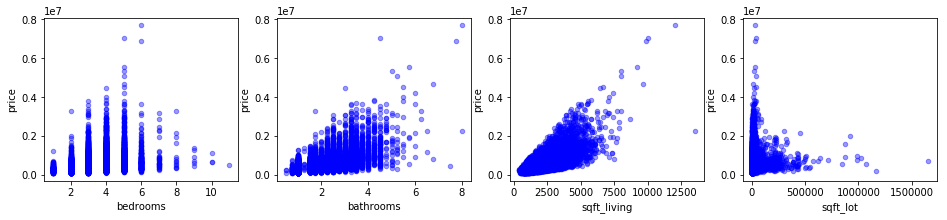

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 

feature_cols = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 
                'floors','sqft_above', 'sqft_basement', 'yr_built',
                'yr_renovated','sqft_living15', 'sqft_lot15']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(feature_cols)[0:4], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

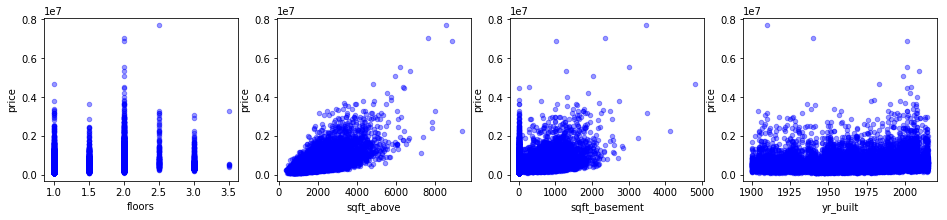

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(feature_cols)[4:8], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

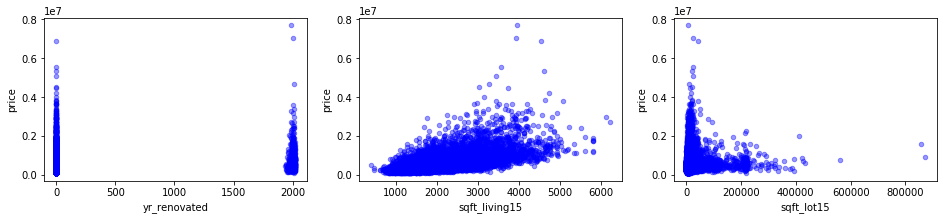

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(list(feature_cols)[8:13], axes):
    df.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

Immediately we can see that Bedrooms, Floors, Year Renovated are interesting. 
Bedrooms and floors should be categorical, and year renovated should not be used because of the high number of zeroes. Instead, we can use the binary is_renovated variable created before
<br/>
<br/>
Below, we transfrom floors, bedrooms, grade, and conditions to categorical variables. 

In [22]:
# let's start a new dataframe that we'll use for anaylsis
df1 = df.copy()

In [23]:
## Look deeper into  floors, bedrooms, and grade, and condition.
# Floors
df1.floors.describe()

count    21081.000000
mean         1.493644
std          0.539372
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

0    (0, 1]
1    (1, 2]
2    (0, 1]
3    (0, 1]
4    (0, 1]
Name: floors, dtype: category
Categories (3, interval[int64]): [(0, 1], (1, 2], (2, 4]]

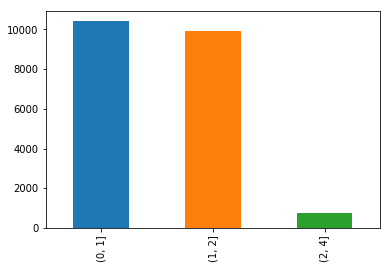

In [24]:
# split into floor categories
bins = [0,1,2,4]
bins_floors = pd.cut(df1['floors'], bins)
bins_floors = bins_floors.cat.as_unordered()
bins_floors.value_counts().plot(kind = 'bar')
bins_floors.head()

In [25]:
# Replace Floors with categories
df1['floors'] = bins_floors

0     (2, 3]
1     (2, 3]
2     (0, 2]
3    (3, 11]
4     (2, 3]
Name: bedrooms, dtype: category
Categories (3, interval[int64]): [(0, 2], (2, 3], (3, 11]]

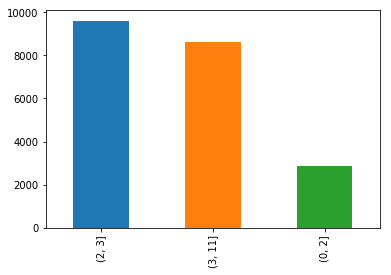

In [26]:
# Do the same for bedrooms 
bins = [0,2,3,11]
bins_br = pd.cut(df1['bedrooms'], bins, right = True)
bins_br = bins_br.cat.as_unordered()
bins_br.value_counts().plot(kind = 'bar')
bins_br.head()

In [27]:
#Replace bedroom column with categories
df1['bedrooms'] = bins_br

In [28]:
# Do the Same for Grades:
df1.grade.describe()

count    21081.000000
mean         7.657749
std          1.173709
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

0    (6, 7]
1    (6, 7]
2    (0, 6]
3    (6, 7]
4    (7, 9]
Name: grade, dtype: category
Categories (4, interval[int64]): [(0, 6], (6, 7], (7, 9], (9, 14]]

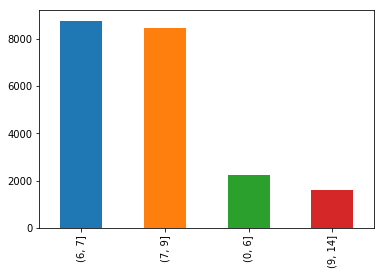

In [29]:
bins = [0,6,7,9,14]
bins_g = pd.cut(df1['grade'], bins, right = True)
bins_g = bins_g.cat.as_unordered()
bins_g.value_counts().plot(kind = 'bar')
bins_g.head()

In [30]:
df1['grade'] = bins_g

In [31]:
# Condition
df1.condition.value_counts()

3    13688
4     5538
5     1661
2      166
1       28
Name: condition, dtype: int64

In [44]:
# Create Dummy Variables

floors_dummy = pd.get_dummies(bins_floors, prefix = 'floors')
bedrooms_dummy = pd.get_dummies(bins_br, prefix = 'bedrooms')
conditions_dummy = pd.get_dummies(df1.condition, prefix = 'condition')
grade_dummy = pd.get_dummies(bins_g, prefix = 'grade')
df1 = df1.drop(['floors', 'bedrooms', 'condition', 'grade'], axis = 1)
df1 =  pd.concat([df1, floors_dummy, bedrooms_dummy, conditions_dummy, grade_dummy], axis=1)

AttributeError: 'DataFrame' object has no attribute 'condition'

In [45]:
df1.columns

Index(['id', 'date', 'price', 'waterfront', 'view', 'grade', 'yr_renovated',
       'zipcode', 'lat', 'long', 'has_basement', 'is_renovated',
       'floors_(0, 1]', 'floors_(1, 2]', 'floors_(2, 4]', 'bedrooms_(0, 2]',
       'bedrooms_(2, 3]', 'bedrooms_(3, 11]', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_(0, 6]',
       'grade_(6, 7]', 'grade_(7, 9]', 'grade_(9, 14]'],
      dtype='object')

# Look at Continuous Variables
Now that we've converted some of our variables to categories, let's explore the remaining continuous variables. <br/>
We can start by looking at a scatter matrix to see general trends, and to check for collinearity. 

In [34]:
# Update the continuous variables to remove bedrooms, floors, and yr_renovated. 

cont_cols = ['bathrooms', 'sqft_living','sqft_lot', 
            'sqft_above', 'sqft_basement', 'yr_built',
             'sqft_living15', 'sqft_lot15']
df_continuous = df1[cont_cols].copy()


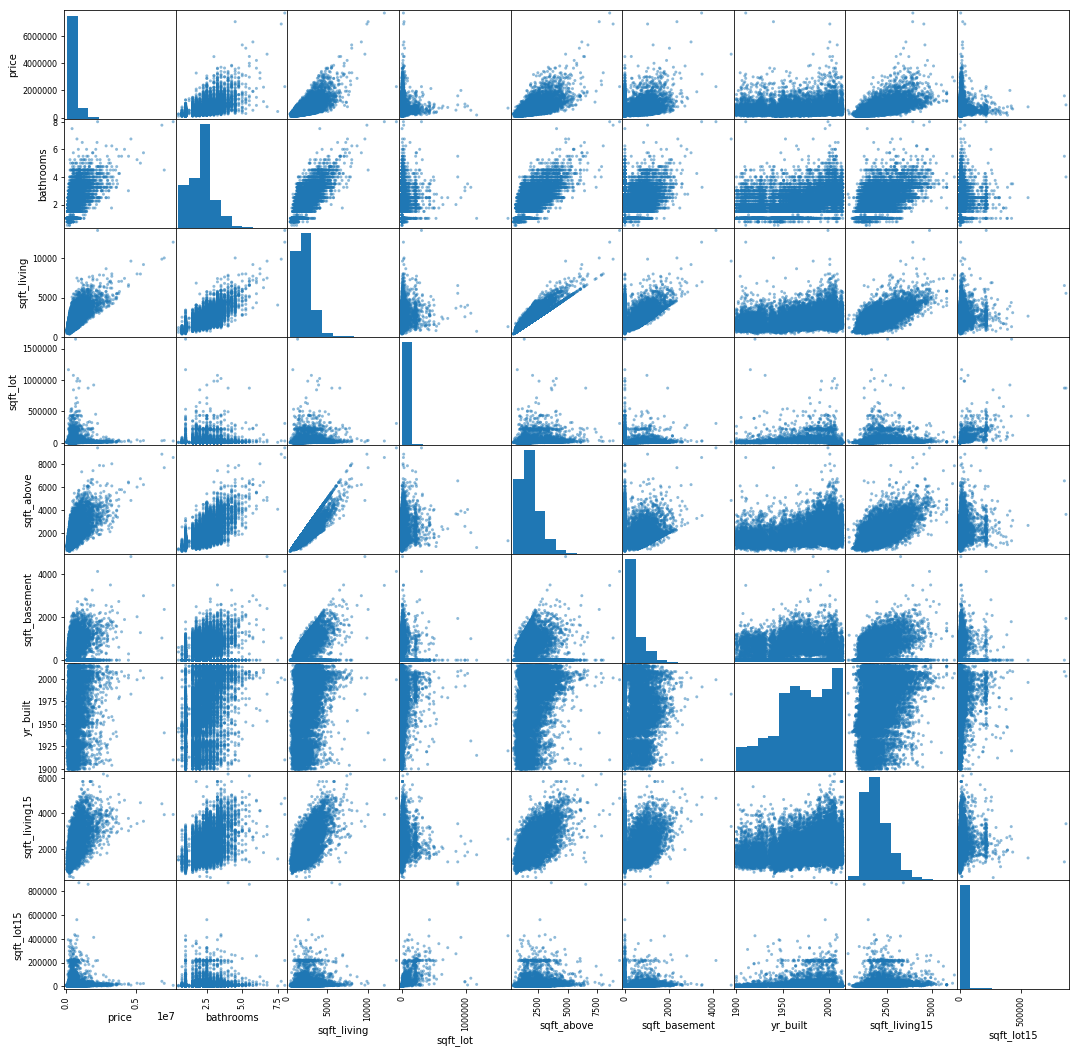

In [35]:
pd.plotting.scatter_matrix(df_continuous, figsize = (18,18));

In [35]:
# Look at a correlation matrix to see where there are variables that are highly collinear. 
abs(df_continuous.corr() > .70)

,price,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,True,False,True,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False
sqft_living,True,True,True,False,True,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,True
sqft_above,False,False,True,False,True,False,False,True,False
sqft_basement,False,False,False,False,False,True,False,False,False
yr_built,False,False,False,False,False,False,True,False,False
sqft_living15,False,False,True,False,True,False,False,True,False
sqft_lot15,False,False,False,True,False,False,False,False,True


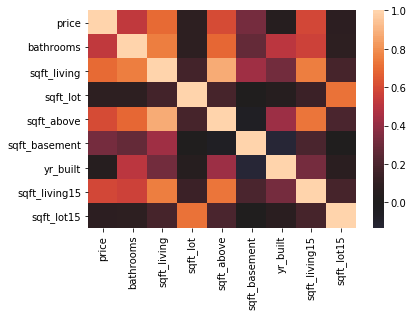

In [36]:
# Plot a heatmap for quick visualization. 
import seaborn as sns
sns.heatmap(df_continuous.corr(), center=0);

In [36]:
# Colinearity of features:
# sqft_living seems to be the most collinear so let's remove
df1 = df1.drop(['sqft_living', 'sqft_lot15'], axis = 1)
df_continuous = df_continuous.drop(['sqft_living', 'sqft_above'], axis = 1)

In [37]:
df1.head()
df1.columns

Index(['id', 'date', 'price', 'bathrooms', 'sqft_lot', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'has_basement',
       'is_renovated', 'floors_(0, 1]', 'floors_(1, 2]', 'floors_(2, 4]',
       'bedrooms_(0, 2]', 'bedrooms_(2, 3]', 'bedrooms_(3, 11]', 'condition_1',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'grade_(0, 6]', 'grade_(6, 7]', 'grade_(7, 9]', 'grade_(9, 14]'],
      dtype='object')

# Checking Normality of Variables and Performing Transformations

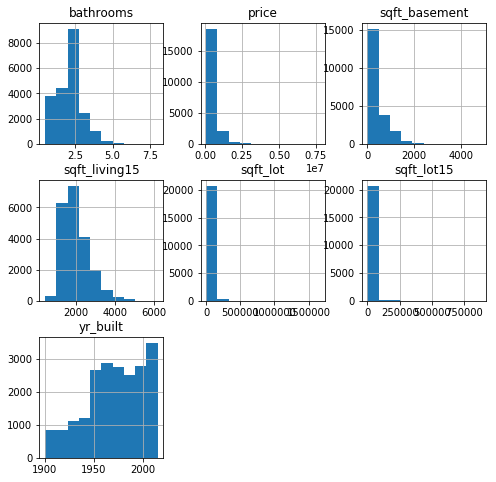

In [38]:
df_continuous.hist(figsize = [8,8]);

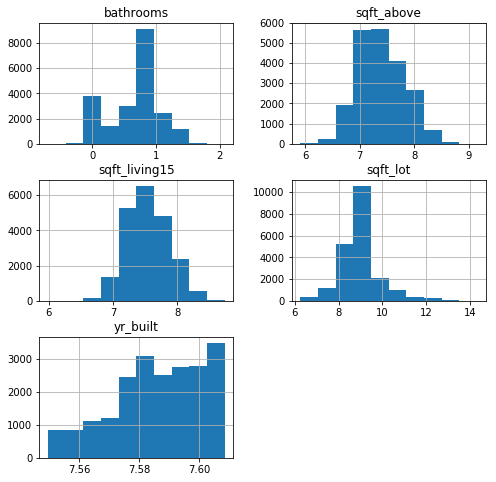

In [39]:
import numpy as np

bathrooms = df1['bathrooms'] # log
sqft_above = df1['sqft_above'] #log
# sqft_basement = df1['sqft_basement'] # Exclude this because it has so many 0's!
sqft_living15 = df1['sqft_living15']
sqft_lot = df1['sqft_lot']
yr_built = df1['yr_built'] # min Max

colz = [bathrooms, sqft_above, sqft_living15, sqft_lot, yr_built]
names = ['bathrooms', 'sqft_above', 'sqft_living15', 'sqft_lot', 'yr_built']


# log transform function
def log_transform(x):
    '''Takes in an array and perfoms a log transform on the data'''
    log = np.log(x)
    return log

transformed = pd.DataFrame([])

for column, name in zip(colz, names):
    transformed[name] = log_transform(column)

transformed.hist(figsize = [8,8]);


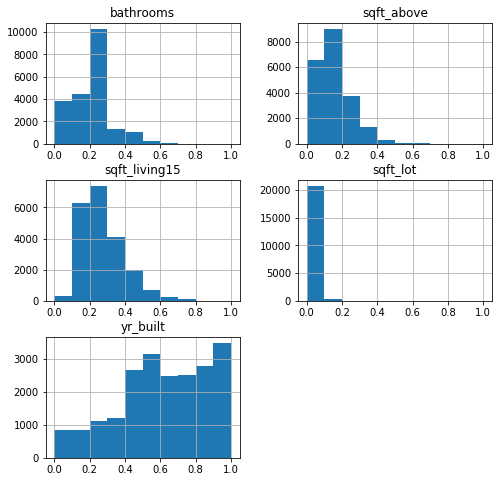

In [40]:
# Further transform variables
# restore log values
## @Brandon For some reasom this is making it worse so currently just appending the log transform??
bathrooms = transformed['bathrooms']
sqft_above = transformed['sqft_above'] 
sqft_living15 = transformed['sqft_living15']
sqft_lot = transformed['sqft_lot']
yr_built = transformed['yr_built']


#min-max function
def min_max(x):
    '''Takes in an array and perfoms a min-max transform on the data'''
    min_max = (x - min(x))/(max(x)-min(x))
    return min_max

# standardization function
def standardization(x):
    '''Takes in an array and perfoms standardization on the data'''
    s = (x-np.mean(x))/np.sqrt(np.var(x))
    return s

# create dataframe of transformed values
final = pd.DataFrame([])
for column, name in zip(colz, names):
    final[name] = min_max(column)
    
# plot histograms for normality
final.hist(figsize = [8,8]);

In [41]:
# Concat Dataframe and drop sqft_basement because it has too many 0's:
df1 = df1.drop(names, axis = 1)
df1 = df1.drop('sqft_basement', axis = 1)

In [42]:
# appending the logs since they're more normal...
df_model = pd.concat([df1, transformed], axis = 1)

# Let's Try a Model

In [46]:
df_model.head()

,id,date,price,waterfront,view,grade,yr_renovated,zipcode,lat,long,...,condition_5,"grade_(0, 6]","grade_(6, 7]","grade_(7, 9]","grade_(9, 14]",bathrooms,sqft_above,sqft_living15,sqft_lot,yr_built
0,7129300520,10/13/2014,221900.0,0.0,0.0,"(6, 7]",0.0,98178,47.5112,-122.257,...,0,0,1,0,0,0.000000,7.073270,7.200425,8.639411,7.578145
1,6414100192,12/9/2014,538000.0,0.0,0.0,"(6, 7]",1991.0,98125,47.7210,-122.319,...,0,0,1,0,0,0.810930,7.682482,7.432484,8.887653,7.576097
2,5631500400,2/25/2015,180000.0,0.0,0.0,"(0, 6]",0.0,98028,47.7379,-122.233,...,0,1,0,0,0,0.000000,6.646391,7.908387,9.210340,7.566828
3,2487200875,12/9/2014,604000.0,0.0,0.0,"(6, 7]",0.0,98136,47.5208,-122.393,...,1,0,1,0,0,1.098612,6.956545,7.215240,8.517193,7.583248
4,1954400510,2/18/2015,510000.0,0.0,0.0,"(7, 9]",0.0,98074,47.6168,-122.045,...,0,0,0,1,0,0.693147,7.426549,7.495542,8.997147,7.594381


In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [47]:
# Don't include price, date, id, yr_renovated (too many 0's), or zipcode
predictors = pd.DataFrame(df_model.drop(['price', 'date', 'id', 'yr_renovated', 'zipcode', 'grade'], axis = 1))

X = predictors
y = df_model['price']


In [48]:
# step-wise selection code
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [51]:
# Try model again, now with stepwise selection
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  floors_(0, 1]                  with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  waterfront                     with p-value 0.0
Add  lat                            with p-value 0.0
Add  grade_(9, 14]                  with p-value 0.0
Add  view                           with p-value 0.0
Add  has_basement                   with p-value 0.0
Add  yr_built                       with p-value 9.18083e-175
Drop floors_(0, 1]                  with p-value 0.186082
Add  grade_(7, 9]                   with p-value 5.24234e-115
Add  bathrooms                      with p-value 3.0122e-37
Add  sqft_living15                  with p-value 3.3689e-34
Add  bedrooms_(0, 2]                with p-value 1.54116e-31
Add  floors_(2, 4]                  with p-value 9.35985e-28
Add  condition_3                    with p-value 3.33252e-28
Add  long                           with p-value 2.64205e-20
Add  is_renovated                   with p-value 3.74019e-21
Add  condition_5      

In [52]:
import statsmodels.api as sm

X_fin = X[result]
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2098.
Date:                Tue, 02 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:11:54   Log-Likelihood:            -2.8881e+05
No. Observations:               21081   AIC:                         5.777e+05
Df Residuals:                   21061   BIC:                         5.778e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.059e+06   1.44e+06     -6.279      0.000   -1.19e+07   -6.23e+06
sqft_above        3.281e+05   8178.203     40.116      0.000    3.12e+05    3.44e+05
waterfront        6.026e+05   1.98e+04     30.445      0.000    5.64e+05    6.41e+05
lat               5.901e+05   1.14e+04     51.563      0.000    5.68e+05    6.13e+05
grade_(9, 14]     4.554e+05   8049.149     56.576      0.000     4.4e+05    4.71e+05
view              6.338e+04   2265.579     27.974      0.000    5.89e+04    6.78e+04
has_basement          1e+05   4042.268     24.745      0.000    9.21e+04    1.08e+05
yr_built         -3.703e+06   1.53e+05    -24.156      0.000      -4e+06    -3.4e+06
grade_(7, 9]      6.196e+04   4188.477     14.793      0.000    5.38e+04    7.02e+04
bathrooms         7.276e+04   6820.595     10.667      0.000    5.94e+04    8.61e+04
sqft_living15     1.236e+05   7511.136     16.457      0.000    1.09e+05    1.38e+05
bedrooms_(0, 2]  -2.975e+06   4.81e+05     -6.186      0.000   -3.92e+06   -2.03e+06
floors_(2, 4]    -2.978e+06   4.82e+05     -6.182      0.000   -3.92e+06   -2.03e+06
long             -1.005e+05   1.33e+04     -7.537      0.000   -1.27e+05   -7.44e+04
is_renovated      8.498e+04   8654.427      9.819      0.000     6.8e+04    1.02e+05
condition_5       8.525e+04   6021.050     14.158      0.000    7.34e+04     9.7e+04
sqft_lot         -1.466e+04   2189.986     -6.696      0.000    -1.9e+04   -1.04e+04
floors_(1, 2]    -3.051e+06    4.8e+05     -6.350      0.000   -3.99e+06   -2.11e+06
floors_(0, 1]     -3.03e+06   4.81e+05     -6.305      0.000   -3.97e+06   -2.09e+06
bedrooms_(3, 11] -3.048e+06   4.81e+05     -6.339      0.000   -3.99e+06   -2.11e+06
bedrooms_(2, 3]  -3.036e+06   4.81e+05     -6.312      0.000   -3.98e+06   -2.09e+06
condition_4       3.802e+04   3740.048     10.165      0.000    3.07e+04    4.53e+04
==============================================================================
Omnibus:                    21259.732   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4300707.896
Skew:                           4.525   Prob(JB):                         0.00
Kurtosis:                      72.385   Cond. No.                     1.36e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
# getting a warning that there is strong multicollinearity so checking again for correlations...
corrs = abs(predictors.corr() > .70)
corrs.sum()


waterfront          1
view                1
lat                 1
long                1
has_basement        1
is_renovated        1
floors_(0, 1]       1
floors_(1, 2]       1
floors_(2, 4]       1
bedrooms_(0, 2]     1
bedrooms_(2, 3]     1
bedrooms_(3, 11]    1
condition_1         1
condition_2         1
condition_3         1
condition_4         1
condition_5         1
grade_(0, 6]        1
grade_(6, 7]        1
grade_(7, 9]        1
grade_(9, 14]       1
bathrooms           1
sqft_above          2
sqft_living15       2
sqft_lot            1
yr_built            1
dtype: int64

In [55]:
## cool cool let's get rid of sqft_living15 and re-run
results = ['sqft_above', 'waterfront', 'lat', 'grade_(9, 14]', 
           'view', 'has_basement', 'yr_built', 'grade_(7, 9]', 
           'bathrooms', 'bedrooms_(0, 2]', 'floors_(2, 4]', 'long', 
           'is_renovated', 'condition_5', 'sqft_lot', 'floors_(1, 2]', 
           'floors_(0, 1]', 'bedrooms_(3, 11]', 'bedrooms_(2, 3]', 'condition_4']
X_fin = X[result]
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2098.
Date:                Tue, 02 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:15:34   Log-Likelihood:            -2.8881e+05
No. Observations:               21081   AIC:                         5.777e+05
Df Residuals:                   21061   BIC:                         5.778e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.059e+06   1.44e+06     -6.279      0.000   -1.19e+07   -6.23e+06
sqft_above        3.281e+05   8178.203     40.116      0.000    3.12e+05    3.44e+05
waterfront        6.026e+05   1.98e+04     30.445      0.000    5.64e+05    6.41e+05
lat               5.901e+05   1.14e+04     51.563      0.000    5.68e+05    6.13e+05
grade_(9, 14]     4.554e+05   8049.149     56.576      0.000     4.4e+05    4.71e+05
view              6.338e+04   2265.579     27.974      0.000    5.89e+04    6.78e+04
has_basement          1e+05   4042.268     24.745      0.000    9.21e+04    1.08e+05
yr_built         -3.703e+06   1.53e+05    -24.156      0.000      -4e+06    -3.4e+06
grade_(7, 9]      6.196e+04   4188.477     14.793      0.000    5.38e+04    7.02e+04
bathrooms         7.276e+04   6820.595     10.667      0.000    5.94e+04    8.61e+04
sqft_living15     1.236e+05   7511.136     16.457      0.000    1.09e+05    1.38e+05
bedrooms_(0, 2]  -2.975e+06   4.81e+05     -6.186      0.000   -3.92e+06   -2.03e+06
floors_(2, 4]    -2.978e+06   4.82e+05     -6.182      0.000   -3.92e+06   -2.03e+06
long             -1.005e+05   1.33e+04     -7.537      0.000   -1.27e+05   -7.44e+04
is_renovated      8.498e+04   8654.427      9.819      0.000     6.8e+04    1.02e+05
condition_5       8.525e+04   6021.050     14.158      0.000    7.34e+04     9.7e+04
sqft_lot         -1.466e+04   2189.986     -6.696      0.000    -1.9e+04   -1.04e+04
floors_(1, 2]    -3.051e+06    4.8e+05     -6.350      0.000   -3.99e+06   -2.11e+06
floors_(0, 1]     -3.03e+06   4.81e+05     -6.305      0.000   -3.97e+06   -2.09e+06
bedrooms_(3, 11] -3.048e+06   4.81e+05     -6.339      0.000   -3.99e+06   -2.11e+06
bedrooms_(2, 3]  -3.036e+06   4.81e+05     -6.312      0.000   -3.98e+06   -2.09e+06
condition_4       3.802e+04   3740.048     10.165      0.000    3.07e+04    4.53e+04
==============================================================================
Omnibus:                    21259.732   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4300707.896
Skew:                           4.525   Prob(JB):                         0.00
Kurtosis:                      72.385   Cond. No.                     1.36e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# @Brandon so still seeing that error of colinearity even though colinear values were removed
# this may have something to do with lat&long
# also why are my confidence intervals so high ugh

In [72]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linreg = LinearRegression()

selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y)

selected_columns = X.columns[selector.support_]
model3 = linreg.fit(X[selected_columns],y)

## how do you see the score of this model???
## model3.score(X, y)